## 라이브러리 로드하기

In [6]:
import pandas as pd

## 클립보드에서 데이터 불러오기

*  위키문서의 데이터를 불러옵니다.
https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%BD%94%EB%A1%9C%EB%82%98%EB%B0%94%EC%9D%B4%EB%9F%AC%EC%8A%A4%EA%B0%90%EC%97%BC%EC%A6%9D-19_%EC%9C%A0%ED%96%89

In [ ]:
# 복사한 데이터를 클립보드에서 가져옵니다.
df = pd.read_clipboard()
df

In [389]:
# 병합된 데이터의 컬럼이 밀려있습니다.
# 필요없는 데이터를 제거하고 마지막에 None을 추가합니다.
loc_0 = df.loc[0].tolist()[1:]
loc_0.append(None)
df.loc[0] = loc_0

In [ ]:
# 파일로 가져온 데이터를 csv 형태로 저장합니다. 
file_name = "covid19-wiki-daily-table.csv"
df.to_csv(file_name, index=False)

In [7]:
# 저장한 파일을 읽어옵니다. raw라는 변수에 담아 재사용합니다.
raw = pd.read_csv(file_name)
raw

,연도,날짜,누적,확진자,누적.1,사망자,누적.2,격리해제자
0,1월,20일,1명,(+1),0명,0명,NaN,NaN
1,1월,24일,2명,(+1),NaN,NaN,NaN,NaN
2,1월,26일,3명,(+1),NaN,NaN,NaN,NaN
3,1월,27일,4명,(+1),NaN,NaN,NaN,NaN
4,1월,30일,6명,(+2),NaN,NaN,NaN,NaN
5,1월,31일,11명,(+5),NaN,NaN,NaN,NaN
6,2월,1일,12명,(+1),NaN,NaN,NaN,NaN
7,2월,2일,15명,(+3),NaN,NaN,NaN,NaN
8,2월,4일,16명,(+1),NaN,NaN,NaN,NaN
9,2월,5일,19명,(+3),1명,(+1),NaN,NaN


In [8]:
# 컬럼이름을 확인합니다.
raw.columns.tolist()

['연도', '날짜', '누적', '확진자', '누적.1', '사망자', '누적.2', '격리해제자']

In [9]:
# rename을 활용해서 "연도" 컬럼을 월로 변경합니다.
raw = raw.rename(columns={"연도":"월"})
raw.head()

,월,날짜,누적,확진자,누적.1,사망자,누적.2,격리해제자
0,1월,20일,1명,(+1),0명,0명,NaN,NaN
1,1월,24일,2명,(+1),NaN,NaN,NaN,NaN
2,1월,26일,3명,(+1),NaN,NaN,NaN,NaN
3,1월,27일,4명,(+1),NaN,NaN,NaN,NaN
4,1월,30일,6명,(+2),NaN,NaN,NaN,NaN


In [10]:
# 제대로 변경되었는지 컬럼명을 확인합니다.
raw.columns.tolist()

['월', '날짜', '누적', '확진자', '누적.1', '사망자', '누적.2', '격리해제자']

In [11]:
# ['월', '날짜', '누적', '확진자', '누적사망', '사망자', '누적해제', '격리해제자'] 로 컬럼명을 변경합니다.
raw.columns = ['월', '날짜', '누적', '확진자', '누적사망', '사망자', '누적해제', '격리해제자']
raw.columns.tolist()

['월', '날짜', '누적', '확진자', '누적사망', '사망자', '누적해제', '격리해제자']

In [12]:
# raw 에 들어있는 값을 df로 복사해서 사본을 만듭니다.
df = raw.copy()
df.head()

,월,날짜,누적,확진자,누적사망,사망자,누적해제,격리해제자
0,1월,20일,1명,(+1),0명,0명,NaN,NaN
1,1월,24일,2명,(+1),NaN,NaN,NaN,NaN
2,1월,26일,3명,(+1),NaN,NaN,NaN,NaN
3,1월,27일,4명,(+1),NaN,NaN,NaN,NaN
4,1월,30일,6명,(+2),NaN,NaN,NaN,NaN


In [13]:
#  tail로 미리보기 합니다.
df.tail()

,월,날짜,누적,확진자,누적사망,사망자,누적해제,격리해제자
28,2월,27일,"1,766명",(+505),13명,(+1),27명,(+3)
29,2월,28일,"2,337명",(+571),16명,(+3),NaN,NaN
30,2월,29일,"3,150명",(+813),17명,(+1),28명,(+1)
31,3월,1일,"3,736명",(+586),18명,(+1),30명,(+2)
32,3월,2일,"4,212명",(+476),22명,(+4),31명,(+1)


## 전처리
* 숫자 데이터를 다루기 위해 ",", "명" 등의 문자를 제거합니다.

In [14]:
# 월, 날짜, 누적, 누적사망, 누적해제 데이터 수치데이터로 바꾸기
df["월"] = df["월"].str.replace("월", "")
df["날짜"] = df["날짜"].str.replace("일", "")
df["누적"] = df["누적"].str.replace("명", "").str.replace(",", "").astype(int)
df["누적사망"] = df["누적사망"].str.replace("명", "").astype(float)
df["누적해제"] = df["누적해제"].str.replace("명", "").astype(float)
df.head()

,월,날짜,누적,확진자,누적사망,사망자,누적해제,격리해제자
0,1,20,1,(+1),0.0,0명,NaN,NaN
1,1,24,2,(+1),NaN,NaN,NaN,NaN
2,1,26,3,(+1),NaN,NaN,NaN,NaN
3,1,27,4,(+1),NaN,NaN,NaN,NaN
4,1,30,6,(+2),NaN,NaN,NaN,NaN


### 날짜

* datetime 변환하기
https://docs.python.org/ko/3/library/datetime.html#strftime-strptime-behavior

In [15]:
# 월, 날짜 컬럼을 붙여 월일, 연월일 데이터를 만듭니다.
# 월일 컬럼은 월과 날짜를 더해서 구하고 연월일은 2020에 월일을 더해서 만듭니다.
# 연월일 컬럼은 pd.to_datetime 으로 연월일을 datetime형식으로 만듭니다.
df["월일"] = df["월"] +"-"+ df["날짜"]
df["연월일"] = "2020"+"-"+ df["월"] +"-"+ df["날짜"]
df["연월일"] = pd.to_datetime(df["연월일"])
df["연월일"].head()

0   2020-01-20
1   2020-01-24
2   2020-01-26
3   2020-01-27
4   2020-01-30
Name: 연월일, dtype: datetime64[ns]

### 오류 데이터 수정

* 클립보드의 표를 그대로 붙여넣으면 셀이 병합된 곳의 데이터가 밀리게 됩니다. 이런 데이터를 전처리 해줍니다.

In [443]:
df.head(1)

,월,날짜,누적,확진자,누적사망,사망자,누적해제,격리해제자,월일,연월일
0,1,20,1,(+1),0.0,0명,NaN,NaN,1-20,2020-01-20


In [444]:
# "2020-02-10","2020-02-12", "2020-02-15" 격리해제자 컬럼에 확진자 수를 넣어줍니다.
df.loc[df["연월일"].isin(["2020-02-10","2020-02-12", "2020-02-15"]), "격리해제자"] = df["확진자"]

In [445]:
# "2020-02-10","2020-02-12", "2020-02-15" 은 확진자를 결측치로 만들어 줍니다.
# "2020-02-22","2020-02-26" 은 사망자를 결측치 처리 합니다.
df.loc[df["연월일"].isin(["2020-02-10","2020-02-12", "2020-02-15"]), "확진자"] = pd.np.nan
df.loc[df["연월일"].isin(["2020-02-22","2020-02-26"]), "사망자"] = pd.np.nan
df

,월,날짜,누적,확진자,누적사망,사망자,누적해제,격리해제자,월일,연월일
0,1,20,1,(+1),0.0,0명,NaN,NaN,1-20,2020-01-20
1,1,24,2,(+1),NaN,NaN,NaN,NaN,1-24,2020-01-24
2,1,26,3,(+1),NaN,NaN,NaN,NaN,1-26,2020-01-26
3,1,27,4,(+1),NaN,NaN,NaN,NaN,1-27,2020-01-27
4,1,30,6,(+2),NaN,NaN,NaN,NaN,1-30,2020-01-30
5,1,31,11,(+5),NaN,NaN,NaN,NaN,1-31,2020-01-31
6,2,1,12,(+1),NaN,NaN,NaN,NaN,2-1,2020-02-01
7,2,2,15,(+3),NaN,NaN,NaN,NaN,2-2,2020-02-02
8,2,4,16,(+1),NaN,NaN,NaN,NaN,2-4,2020-02-04
9,2,5,19,(+3),1.0,(+1),NaN,NaN,2-5,2020-02-05


In [446]:
# 모든 날짜가 없기 때문에 first_day, last_day 로 날짜를 만듭니다.
cnt = df.shape[0] - 1
first_day = df.loc[0, "연월일"]
last_day = df.loc[cnt, "연월일"]
last_day

Timestamp('2020-03-02 00:00:00')

In [447]:
# pd.date_range 로 모든 날짜를 다 만듭니다.
# pd.DataFrame 으로 "연월일" 컬럼에 만들어준 날짜를 데이터프레임으로 만듭니다.
days = pd.date_range(first_day, last_day)
days = pd.DataFrame({"연월일": days})
days.head()

,연월일
0,2020-01-20
1,2020-01-21
2,2020-01-22
3,2020-01-23
4,2020-01-24


In [448]:
# days 와 df를 merge로 합치고 기준은 왼쪽 데이터로 합니다.
df_days = days.merge(df, how="left")
df_days.head()

,연월일,월,날짜,누적,확진자,누적사망,사망자,누적해제,격리해제자,월일
0,2020-01-20,1,20,1.0,(+1),0.0,0명,NaN,NaN,1-20
1,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-24,1,24,2.0,(+1),NaN,NaN,NaN,NaN,1-24


### 정규표현식으로 문자 전처리 하기

In [449]:
# (+1) 로 확진자 증감을 표시하고 있습니다. 이를 전처리 해서 숫자만 추출합니다.
import re
num = "(+1)"
re.sub("\(\+(?P<num>\d)\)", "\g<num>", num)

'1'

* 정규표현식 사용방법을 더 알고 싶다면 다음 링크를 참고하면 좋습니다. [07-2 정규 표현식 시작하기 - 점프 투 파이썬](https://wikidocs.net/4308#_2)

In [450]:
# parse_num 이라는 함수를 만들어 숫자만 추출할 수 있도록 합니다.
# 또, 전처리 후에는 데이터의 타입을 int로 변환합니다.
def parse_num(num):
    if pd.isnull(num):
        return 0
    result = re.sub("\(\+(?P<num>\d+)\)", "\g<num>", num)
    result = int(result)
    return result

In [451]:
df_days.head(1)

,연월일,월,날짜,누적,확진자,누적사망,사망자,누적해제,격리해제자,월일
0,2020-01-20,1,20,1.0,(+1),0.0,0명,NaN,NaN,1-20


In [452]:
# map, apply를 사용하면 함수를 적용할 수 있습니다. 
# 위에서 만든 함수를 확진자 컬럼에 적용합니다. 
# 그리고 확진누적 컬럼을 만들어서 cumsum()을 통해 누적 확진자 수를 계산해 봅니다.
df_days["확진수"] = df_days["확진자"].map(parse_num)
df_days["확진누적"] = df_days["확진수"].cumsum()
df_days[["연월일", "확진수", "확진누적", "누적"]]

,연월일,확진수,확진누적,누적
0,2020-01-20,1,1,1.0
1,2020-01-21,0,1,NaN
2,2020-01-22,0,1,NaN
3,2020-01-23,0,1,NaN
4,2020-01-24,1,2,2.0
5,2020-01-25,0,2,NaN
6,2020-01-26,1,3,3.0
7,2020-01-27,1,4,4.0
8,2020-01-28,0,4,NaN
9,2020-01-29,0,4,NaN


In [453]:
# 사망자 컬럼을 전처리하고 숫자만 추출해서 "사망수"라는 컬럼을 만듭니다.
# 위에서 만든 parse_num 함수로 전처리 합니다.
df_days["사망수"] = df_days["사망자"].str.replace("명", "")
df_days["사망수"] = df_days["사망수"].map(parse_num)
df_days[["연월일", "사망자", "사망수"]].tail()

,연월일,사망자,사망수
38,2020-02-27,(+1),1
39,2020-02-28,(+3),3
40,2020-02-29,(+1),1
41,2020-03-01,(+1),1
42,2020-03-02,(+4),4


In [454]:
# html 테이블 병합으로 연월일 데이터가 제대로 들어가 있지 않습니다. 계산을 위해 
# df_days["연월일"] < "2020-02-20" 에 해당되는 '사망수', '누적사망' 값을 결측치로 만듭니다.
df_days.loc[df_days["연월일"] < "2020-02-20", "사망수"] = np.nan
df_days.loc[df_days["연월일"] < "2020-02-20", "누적사망"] = np.nan

In [455]:
## cumsum 으로 사망누적 수를 구합니다.
df_days["사망누적"] = df_days["사망수"].cumsum()
df_days[["연월일", "사망수", "누적사망", "사망누적"]].tail()

,연월일,사망수,누적사망,사망누적
38,2020-02-27,1.0,13.0,13.0
39,2020-02-28,3.0,16.0,16.0
40,2020-02-29,1.0,17.0,17.0
41,2020-03-01,1.0,18.0,18.0
42,2020-03-02,4.0,22.0,22.0


In [466]:
# df_days["누적fill"] = df_days["누적"].fillna(method="ffill")
df_days["누적fill"] = df_days["누적"].ffill()
df_days[["누적", "누적fill"]].tail()

,누적,누적fill
38,1766.0,1766.0
39,2337.0,2337.0
40,3150.0,3150.0
41,3736.0,3736.0
42,4212.0,4212.0


## 시각화
### 시각화 도구 불러오기

In [467]:
import seaborn as sns
import matplotlib.pyplot as plt

In [458]:
df_days["월일"] = df_days["연월일"].dt.month.astype(str) + "-"+ df_days["연월일"].dt.day.astype(str)
df_days["월일"].head()

0    1-20
1    1-21
2    1-22
3    1-23
4    1-24
Name: 월일, dtype: object

### 누적 데이터 시각화

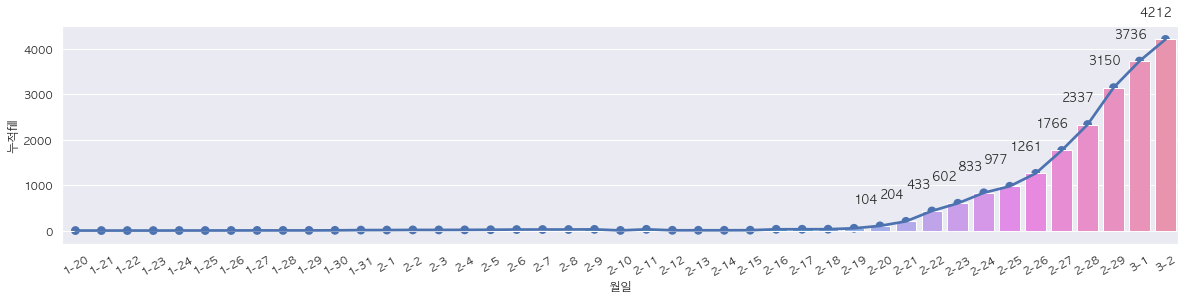

In [463]:
# sns.set(font='Malgun Gothic')
sns.set(font='AppleGothic')
plt.figure(figsize=(20, 4))
plt.xticks(rotation=30)
g = sns.pointplot(data=df_days, x="월일", y="누적fill")
g = sns.barplot(data=df_days, x="월일", y="누적fill")
for i, cnt in enumerate(df_days["누적fill"]):
    if cnt > 100:
        g.text(x=i-1, y=cnt+500, s=round(cnt))

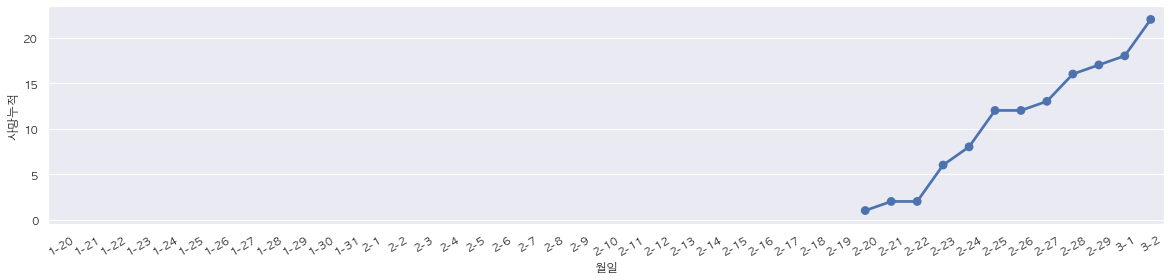

In [465]:
# sns.set(font='Malgun Gothic')
sns.set(font='AppleGothic')
plt.figure(figsize=(20, 4))
plt.xticks(rotation=30)
g = sns.pointplot(data=df_days, x="월일", y="사망누적")

## 사용하지 않는 컬럼 삭제

In [ ]:
df_days.drop(["누적사망", "날짜"], axis=1)

## 지역별 확진자

In [470]:
# 클립보드로 복사를 하면 원하는 형태로 저장이 되지 않고 병합셀이 밀리는 문제가 있습니다.
df_region = pd.read_clipboard()
df_region

,,,,,,,,,,지역,확진환자
확진자,수,신천지대구교회,관련,청도,대남,병원,관련,기준,해외,유입관련,기타
서울,74,4,0,18,52,NaN,NaN,NaN,NaN,None,None
부산,77,8,2,0,67,NaN,NaN,NaN,NaN,None,None
대구,"2,055",1356,697,NaN,NaN,NaN,NaN,NaN,NaN,None,None
인천,6,1,0,1,4,NaN,NaN,NaN,NaN,None,None
광주,9,7,1,NaN,NaN,NaN,NaN,NaN,NaN,None,None
대전,14,0,0,14,NaN,NaN,NaN,NaN,NaN,None,None
울산,17,8,9,NaN,NaN,NaN,NaN,NaN,NaN,None,None
세종,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,None,None
경기,76,13,11,52,NaN,NaN,NaN,NaN,NaN,None,None


### 텍스트데이터 데이터프레임으로 만들기

In [17]:
# 텍스트를 그대로 복사해 옵니다.
copy_text = """지역	확진자 수	신천지대구교회 관련	청도 대남 병원 관련	기준 해외 유입관련	기타
서울	74	4	0	18	52
부산	77	8	2	0	67
대구	2,055	1356	0	697
인천	6	1	0	1	4
광주	9	7	0	1
대전	14	0	0	14
울산	17	8	0	9
세종	1	1	0	0
경기	76	13	0	11	52
강원	7	3	0	4
충북	10	4	0	6
충남	48	0	0	48
전북	5	0	1	4
전남	2	0	0	1
경북	469	133	115	0	221
경남	59	19	0	40
제주	2	0	0	2"""
copy_text

'지역\t확진자 수\t신천지대구교회 관련\t청도 대남 병원 관련\t기준 해외 유입관련\t기타\n서울\t74\t4\t0\t18\t52\n부산\t77\t8\t2\t0\t67\n대구\t2,055\t1356\t0\t697\n인천\t6\t1\t0\t1\t4\n광주\t9\t7\t0\t1\n대전\t14\t0\t0\t14\n울산\t17\t8\t0\t9\n세종\t1\t1\t0\t0\n경기\t76\t13\t0\t11\t52\n강원\t7\t3\t0\t4\n충북\t10\t4\t0\t6\n충남\t48\t0\t0\t48\n전북\t5\t0\t1\t4\n전남\t2\t0\t0\t1\n경북\t469\t133\t115\t0\t221\n경남\t59\t19\t0\t40\n제주\t2\t0\t0\t2'

### 2차원 리스트 형태로 만들기

In [18]:
# 텍스트 데이터를 전처리해서 데이터프레임 형태로 가공합니다.
split_text = copy_text.split("\n")
city_data = []
for t in split_text:
    split_t = t.split("\t")
    city_data.append(split_t)
city_data

[['지역', '확진자 수', '신천지대구교회 관련', '청도 대남 병원 관련', '기준 해외 유입관련', '기타'],
 ['서울', '74', '4', '0', '18', '52'],
 ['부산', '77', '8', '2', '0', '67'],
 ['대구', '2,055', '1356', '0', '697'],
 ['인천', '6', '1', '0', '1', '4'],
 ['광주', '9', '7', '0', '1'],
 ['대전', '14', '0', '0', '14'],
 ['울산', '17', '8', '0', '9'],
 ['세종', '1', '1', '0', '0'],
 ['경기', '76', '13', '0', '11', '52'],
 ['강원', '7', '3', '0', '4'],
 ['충북', '10', '4', '0', '6'],
 ['충남', '48', '0', '0', '48'],
 ['전북', '5', '0', '1', '4'],
 ['전남', '2', '0', '0', '1'],
 ['경북', '469', '133', '115', '0', '221'],
 ['경남', '59', '19', '0', '40'],
 ['제주', '2', '0', '0', '2']]

In [19]:
# 위 리스트에 있는 값을 데이터프레임 형태로 만듭니다.
df_city = pd.DataFrame(city_data)
df_city.head()

,0,1,2,3,4,5
0,지역,확진자 수,신천지대구교회 관련,청도 대남 병원 관련,기준 해외 유입관련,기타
1,서울,74,4,0,18,52
2,부산,77,8,2,0,67
3,대구,"2,055",1356,0,697,None
4,인천,6,1,0,1,4


In [20]:
# 0번째 행에 컬럼값이 있습니다. 이 값을 컬럼으로 만듭니다.
df_city.columns = df_city.loc[0].to_list()
df_city = df_city.drop(0)

In [21]:
# 전처리가 잘 되었는지 확인합니다.
df_city

,지역,확진자 수,신천지대구교회 관련,청도 대남 병원 관련,기준 해외 유입관련,기타
1,서울,74,4,0,18,52
2,부산,77,8,2,0,67
3,대구,"2,055",1356,0,697,None
4,인천,6,1,0,1,4
5,광주,9,7,0,1,None
6,대전,14,0,0,14,None
7,울산,17,8,0,9,None
8,세종,1,1,0,0,None
9,경기,76,13,0,11,52
10,강원,7,3,0,4,None


In [22]:
# 시각화를 위해 지역을 인덱스로 만듭니다.
df_city = df_city.set_index("지역")

In [23]:
# info로 전처리한 데이터프레임의 정보를 봅니다.
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 서울 to 제주
Data columns (total 5 columns):
확진자 수          17 non-null object
신천지대구교회 관련     17 non-null object
청도 대남 병원 관련    17 non-null object
기준 해외 유입관련     17 non-null object
기타             5 non-null object
dtypes: object(5)
memory usage: 816.0+ bytes


In [24]:
# "확진자 수"를 전처리 해서 "확진자" 컬럼에 int형태로 담습니다.
df_city["확진자"] = df_city["확진자 수"].str.replace(",", "").astype(int)

In [25]:
# df_city["확진자"] 수를 정렬합니다.
s = df_city["확진자"].sort_values()
s

지역
세종       1
제주       2
전남       2
전북       5
인천       6
강원       7
광주       9
충북      10
대전      14
울산      17
충남      48
경남      59
서울      74
경기      76
부산      77
경북     469
대구    2055
Name: 확진자, dtype: int64

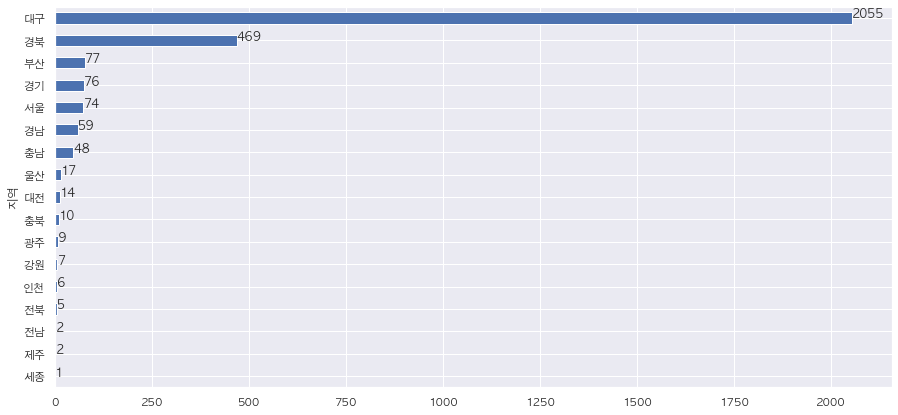

In [549]:
# pandas 의 series 데이터를 plot.barh 로 시각화 합니다.
# 숫자도 함께 표시해 봅니다.
g = s.plot.barh(figsize=(15, 7))
for i, t in enumerate(s):
    g.text(x=t, y=i, s=t)